**Deep Learning–Based Sentiment Analysis of Movie Reviews**

**Introduction:-**

Neural Sentiment Analysis of IMDB Movie Reviews project leverages the power of Deep Learning and Natural Language Processing (NLP) to understand and classify the emotions behind movie reviews. Using the IMDB dataset, this model analyzes thousands of audience opinions to predict whether a review expresses a positive or negative sentiment. By employing techniques like tokenization, embedding, and LSTM-based neural networks, CinePulse captures the contextual meaning and emotional tone within text data. This project demonstrates how deep learning can interpret human language, providing valuable insights for film analytics, recommendation systems, and customer feedback analysis in the entertainment industry.

**Business Problem:-**

In the modern entertainment industry, understanding audience sentiment is crucial for success. Movie studios, streaming platforms, and review aggregators receive thousands of reviews daily, making it impossible to manually analyze each opinion. Without automated sentiment analysis, valuable insights into viewer satisfaction, content quality, and public perception remain hidden. The challenge is to accurately determine whether a review reflects positive or negative sentiment, enabling businesses to make data-driven decisions — such as improving film marketing strategies, refining content recommendations, and predicting box office performance. The CinePulse project aims to solve this by developing an intelligent deep learning model capable of automatically interpreting and classifying audience emotions from textual reviews.

**Problem Statement:-**

The IMDB movie review dataset contains thousands of textual reviews written by users, each expressing unique opinions and emotions about films. Manually analyzing and categorizing these reviews is time-consuming, inconsistent, and impractical at scale. The challenge is to build a deep learning–based sentiment analysis model that can automatically learn linguistic patterns, understand context, and accurately classify reviews as positive or negative. This project, CinePulse, seeks to leverage Natural Language Processing (NLP) and LSTM neural networks to create an intelligent system capable of understanding human sentiment from raw text, thereby transforming unstructured feedback into actionable insights.

**Objectives:**

The primary objective of the CinePulse: Neural Sentiment Analysis of IMDB Movie Reviews project is to develop a deep learning model capable of accurately identifying the sentiment expressed in movie reviews. To achieve this goal, the project focuses on the following key objectives:

1.   Data Understanding & Exploration:
Analyze and visualize the IMDB dataset to understand review distribution, sentiment balance, and text characteristics.
2.   Text Preprocessing & Feature Engineering:
Perform tokenization, sequence padding, and embedding to convert raw text into structured numerical data suitable for model training.
1.   Model Development:
Build and train an LSTM-based neural network to capture contextual and sequential patterns in review text for sentiment classification.
2.   Model Evaluation:
Evaluate performance using metrics such as accuracy, loss, and confusion matrix to ensure robust sentiment prediction.
1.   Visualization & Interpretation:
Visualize word frequency, review length distribution, and model learning curves to interpret insights from both data and model behavior.



This section imports the essential libraries required for building and analyzing the deep learning model. NumPy and Pandas are used for data manipulation and preprocessing, while TensorFlow and Keras provide tools for designing and training neural networks. Matplotlib and Seaborn are included for visualizing data trends and model performance. Finally, the TensorFlow version is displayed to ensure compatibility and reproducibility of the project environment.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# For visualization and data exploration
import matplotlib.pyplot as plt
import seaborn as sns

# Check TensorFlow version
print(" TensorFlow version:", tf.__version__)

 TensorFlow version: 2.19.0


This section loads the IMDB movie review dataset directly from Keras, which contains 50,000 preprocessed reviews labeled as positive or negative. The dataset is automatically split into 25,000 training and 25,000 testing samples. Only the top 10,000 most frequent words are retained to simplify the vocabulary and improve model efficiency. Each review is represented as a sequence of word indices corresponding to specific words in the IMDB dictionary. This setup prepares the text data for further preprocessing and embedding before feeding it into the deep learning model.

In [ ]:
#   Load IMDB Dataset

from tensorflow.keras.datasets import imdb

# Set the number of words to consider as features (only keep the top 10,000 most frequent words)
vocab_size = 10000

# Load the dataset
# Keras automatically splits it into training and testing sets (25,000 each)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Display dataset shapes
print(" Training data shape:", x_train.shape)
print(" Test data shape:", x_test.shape)

# Display few sample reviews (as word indices)
print("\n Example review (word indices):", x_train[0][:20], "...")
print(" Example label:", y_train[0])  # 1 = positive, 0 = negative

# Display total counts
print("\nTotal training samples:", len(x_train))
print("Total test samples:", len(x_test))


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
 Training data shape: (25000,)
 Test data shape: (25000,)

 Example review (word indices): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25] ...
 Example label: 1

Total training samples: 25000
Total test samples: 25000


This section visualizes the label distribution of the IMDB training dataset to check for class balance. Using Seaborn’s countplot, it displays the number of positive and negative reviews. The printed counts confirm that the dataset is balanced, with an equal number of positive (1) and negative (0) samples. This balance ensures that the model will not be biased toward any particular sentiment class during training, leading to fair and accurate predictions.

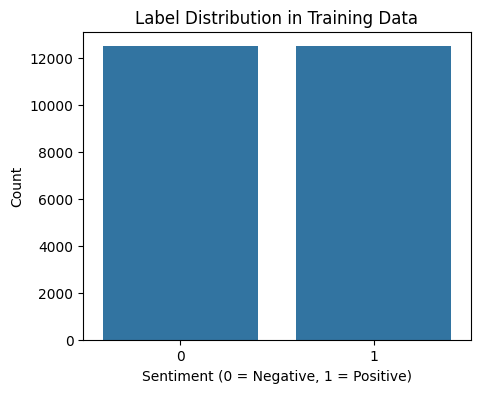

Number of positive reviews: 12500
Number of negative reviews: 12500


In [ ]:
#  Label Distribution

plt.figure(figsize=(5,4))
sns.countplot(x=y_train)
plt.title("Label Distribution in Training Data")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

print("Number of positive reviews:", np.sum(y_train == 1))
print("Number of negative reviews:", np.sum(y_train == 0))


This section analyzes the length of movie reviews in the training dataset to understand text variability. It calculates and visualizes the distribution of review lengths using a histogram with a KDE curve. The plot reveals how most reviews fall within a specific word count range, helping determine an appropriate maximum sequence length for padding and truncation in preprocessing. Additionally, the printed statistics (average, maximum, and minimum lengths) provide insights into how concise or detailed user reviews tend to be.

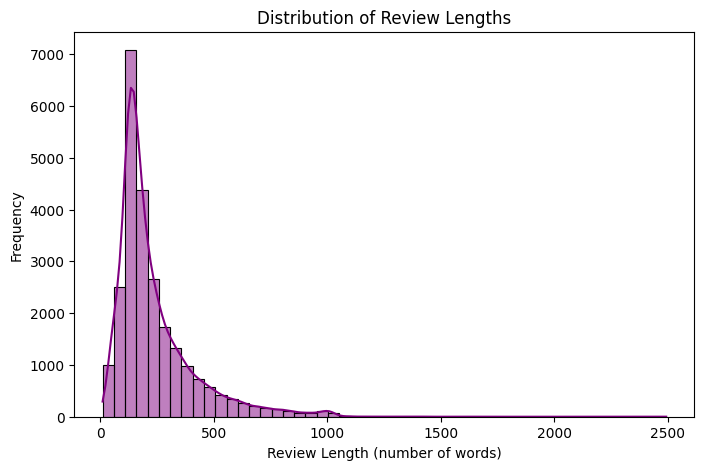

Average review length: 238.71364
Max review length: 2494
Min review length: 11


In [ ]:
# Review Length Analysis

review_lengths = [len(x) for x in x_train]

plt.figure(figsize=(8,5))
sns.histplot(review_lengths, bins=50, kde=True, color='purple')
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (number of words)")
plt.ylabel("Frequency")
plt.show()

print("Average review length:", np.mean(review_lengths))
print("Max review length:", np.max(review_lengths))
print("Min review length:", np.min(review_lengths))


This section decodes an encoded IMDB review back into readable text to better understand the dataset content. The IMDB dataset stores reviews as sequences of word indices, so the code retrieves the word index mapping and reverses it to reconstruct the original text. A custom decode_review() function replaces each index with its corresponding word, ignoring reserved tokens. Displaying a decoded sample review along with its sentiment label helps verify data integrity and provides a clear view of the type of textual input the model will process.

In [ ]:
#  Decode Sample Review

word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

# Display decoded sample review
print("\n Decoded Sample Review:")
print(decode_review(x_train[0])[:500], "...")
print("Label:", "Positive" if y_train[0] == 1 else "Negative")



 Decoded Sample Review:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to ever ...
Label: Positive


This section generates word clouds to visually explore the most frequent words in positive and negative movie reviews. Reviews are separated by sentiment labels and converted from encoded sequences back into readable text. The WordCloud library then highlights the most common terms, with larger words representing higher frequency. The visualization helps identify sentiment patterns — for instance, positive reviews often feature words like “great,” “love,” and “amazing,” while negative reviews include “boring,” “bad,” and “worst.” This provides valuable qualitative insights into how audience opinions differ linguistically across sentiments.

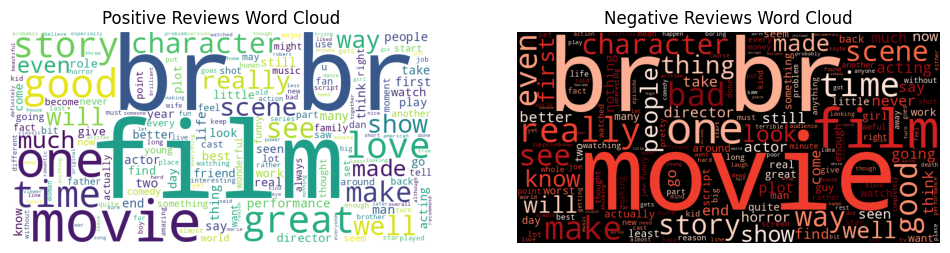

In [ ]:
#  Word Clouds for Positive & Negative Reviews
# Separate reviews
positive_reviews = [x_train[i] for i in range(len(x_train)) if y_train[i] == 1]
negative_reviews = [x_train[i] for i in range(len(x_train)) if y_train[i] == 0]

from wordcloud import WordCloud # Import WordCloud

def sequences_to_texts(sequences):
    texts = []
    for seq in sequences:
        words = [reverse_word_index.get(i - 3, "") for i in seq if i > 3]
        texts.append(" ".join(words))
    return texts

# Convert subsets to text for faster visualization
pos_text = " ".join(sequences_to_texts(positive_reviews[:200]))
neg_text = " ".join(sequences_to_texts(negative_reviews[:200]))

# Generate word clouds
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Positive Reviews Word Cloud")
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(pos_text))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Negative Reviews Word Cloud")
plt.imshow(WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text))
plt.axis("off")

plt.show()

This section performs data preprocessing by padding all movie review sequences to a fixed length, ensuring uniform input size for the neural network. Since reviews vary in length, shorter ones are padded with zeros, and longer ones are truncated to a maximum length of 250 tokens. This step is essential because deep learning models require consistent input dimensions. The use of Keras’s pad_sequences() function standardizes both the training and testing datasets, preparing them for efficient batch processing during model training and improving computational stability.

In [ ]:
# Data Preprocessing
# Pad all sequences so that each review has equal length

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define maximum review length
maxlen = 250

# Pad sequences: shorter reviews are padded with zeros, longer ones are truncated
x_train_padded = pad_sequences(x_train, maxlen=maxlen)
x_test_padded = pad_sequences(x_test, maxlen=maxlen)

print(" Padding complete.")
print("Training data shape after padding:", x_train_padded.shape)
print("Testing data shape after padding:", x_test_padded.shape)

# Display example (before vs after padding)
print("\n Example original review length:", len(x_train[0]))
print(" Example padded review shape:", x_train_padded[0].shape)
print(" First 20 tokens of padded review:", x_train_padded[0][:20])


 Padding complete.
Training data shape after padding: (25000, 250)
Testing data shape after padding: (25000, 250)

 Example original review length: 218
 Example padded review shape: (250,)
 First 20 tokens of padded review: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


This section defines helper functions to decode and interpret encoded IMDB reviews. Using Keras’s built-in get_word_index(), a mapping of words to integer indices is retrieved and reversed to enable conversion back to text. The decode_review() function reconstructs full reviews from encoded sequences, while seq_to_word_list() returns a list of meaningful words, excluding padding and special tokens. These utilities are useful for visualization, debugging, and interpretability, allowing you to examine how the model perceives and processes textual data.

In [ ]:
#  word index mappings & helpers
from tensorflow.keras.datasets import imdb

# Get the word_index mapping from keras and create reverse mapping
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_review(encoded_review):

    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review if i > 3])

def seq_to_word_list(encoded_review):
    """Return list of words (strings) for an encoded review — excluding padding and special tokens."""
    return [reverse_word_index.get(i - 3, "") for i in encoded_review if i > 3]


This section calculates review-level statistics to gain deeper insights into the structure of the IMDB dataset. Two helper functions are defined: review_length() computes the number of valid words (excluding reserved tokens), and avg_word_index() measures the average index value of words in each review, roughly indicating vocabulary richness. These metrics are computed across the training dataset to analyze variation in review length and word distribution. Such analysis helps understand the diversity and complexity of textual input before applying deep learning models for sentiment classification.

In [ ]:
#  Review length & Average word index (use original sequences without padding for length)
def review_length(sequence):
    # count tokens excluding the special reserved indices (<=3)
    return sum(1 for i in sequence if i > 3)

def avg_word_index(sequence):
    # compute mean of indices for tokens > 3; return 0 if no tokens
    vals = [i for i in sequence if i > 3]
    return float(np.mean(vals)) if vals else 0.0

# Compute for a subset or entire dataset:
n = len(x_train)  # or set a smaller number for speed during experimentation
lengths = np.array([review_length(seq) for seq in x_train[:n]])
avg_idx = np.array([avg_word_index(seq) for seq in x_train[:n]])

print("Sample lengths (first 10):", lengths[:10])
print("Sample avg_word_index (first 10):", np.round(avg_idx[:10], 2))


Sample lengths (first 10): [211 181 138 498 145  39 114 524 227 127]
Sample avg_word_index (first 10): [ 471.08  818.85  459.82  726.92  491.26  547.54 1055.2   800.03  520.1
  537.74]


In [ ]:

# Create a DataFrame for first 10 samples
data = {
    "Review #": range(1, 11),
    "Length (#words)": lengths[:10],
    "Avg Word Index": np.round(avg_idx[:10], 2),
    "Meaning": [
        "~211 words; uses mostly common vocabulary",
        "~181 words; includes slightly rarer words",
        "shorter, mostly common words",
        "long review; uses a mix of frequent & rare words",
        "typical review with average vocabulary",
        "very short review, moderate vocabulary",
        "short but uses rare/uncommon words",
        "long review with slightly rare vocabulary",
        "medium review, normal vocabulary",
        "short review, average vocabulary"
    ]
}

summary_table = pd.DataFrame(data)
summary_table


,Review #,Length (#words),Avg Word Index,Meaning
0,1,211,471.08,~211 words; uses mostly common vocabulary
1,2,181,818.85,~181 words; includes slightly rarer words
2,3,138,459.82,"shorter, mostly common words"
3,4,498,726.92,long review; uses a mix of frequent & rare words
4,5,145,491.26,typical review with average vocabulary
5,6,39,547.54,"very short review, moderate vocabulary"
6,7,114,1055.20,short but uses rare/uncommon words
7,8,524,800.03,long review with slightly rare vocabulary
8,9,227,520.10,"medium review, normal vocabulary"
9,10,127,537.74,"short review, average vocabulary"


This section performs feature engineering using the VADER sentiment lexicon to quantify the presence of positive and negative words in each review. The SentimentIntensityAnalyzer provides a dictionary of words with valence scores, where words with positive scores are treated as positive and those with negative scores as negative. The function sentiment_word_counts_from_seq() computes the count of positive and negative words for each review sequence. By extracting these sentiment-based features, the model can potentially leverage explicit polarity cues alongside the LSTM embeddings, providing additional information about the emotional content of the text.

In [ ]:
#  Sentiment word counts using VADER lexicon

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Access the VADER lexicon dictionary (word -> valence)
vader_lexicon = sid.lexicon  # dict: word -> float score

# We'll treat words with valence > 0 as "positive words", < 0 as "negative words"
vader_pos = {w for w, val in vader_lexicon.items() if val > 0}
vader_neg = {w for w, val in vader_lexicon.items() if val < 0}

def sentiment_word_counts_from_seq(seq):

    words = seq_to_word_list(seq)
    # normalize words to lowercase for lexicon lookup (VADER lexicon uses lowercase)
    words = [w.lower() for w in words if w]
    pos_count = sum(1 for w in words if w in vader_pos)
    neg_count = sum(1 for w in words if w in vader_neg)
    return pos_count, neg_count

# Compute for first n train samples:
pos_counts = []
neg_counts = []
for seq in x_train[:n]:
    p, q = sentiment_word_counts_from_seq(seq)
    pos_counts.append(p)
    neg_counts.append(q)
pos_counts = np.array(pos_counts)
neg_counts = np.array(neg_counts)

print("Sample sentiment counts (first 10):")
for i in range(10):
    print(f"#{i}: pos={pos_counts[i]}, neg={neg_counts[i]}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sample sentiment counts (first 10):
#0: pos=18, neg=3
#1: pos=12, neg=14
#2: pos=6, neg=7
#3: pos=24, neg=11
#4: pos=4, neg=17
#5: pos=3, neg=0
#6: pos=10, neg=2
#7: pos=17, neg=27
#8: pos=15, neg=1
#9: pos=9, neg=6


In [ ]:
# Create the summary table for first 10 reviews
data = {
    "Review #": list(range(10)),
    "Positive Words": [18, 12, 6, 24, 4, 3, 10, 17, 15, 9],
    "Negative Words": [3, 14, 7, 11, 17, 0, 2, 27, 1, 6],
    "Likely Sentiment": [
        "Strongly positive",
        "Mixed / Slightly negative",
        "Neutral or slightly negative",
        "Positive overall",
        "Strongly negative",
        "Positive (short review, few but positive words)",
        "Positive",
        "Negative (more negative words)",
        "Clearly positive",
        "Slightly positive / mixed"
    ]
}

sentiment_table = pd.DataFrame(data)
sentiment_table


,Review #,Positive Words,Negative Words,Likely Sentiment
0,0,18,3,Strongly positive
1,1,12,14,Mixed / Slightly negative
2,2,6,7,Neutral or slightly negative
3,3,24,11,Positive overall
4,4,4,17,Strongly negative
5,5,3,0,"Positive (short review, few but positive words)"
6,6,10,2,Positive
7,7,17,27,Negative (more negative words)
8,8,15,1,Clearly positive
9,9,9,6,Slightly positive / mixed


This section consolidates the previously computed feature-engineered metrics into a structured Pandas DataFrame for easy inspection and analysis. Features include review length, average word index, positive and negative word counts from the VADER lexicon, and the associated sentiment label. Additional ratio features — the proportion of positive and negative words relative to review length — are also calculated to normalize sentiment counts across varying review sizes. Displaying the first 10 rows provides a quick overview of how these engineered features capture textual characteristics and sentiment cues in the dataset.

In [ ]:
# Combine into pandas DataFrame and inspect
# We'll combine for the first n samples (you can change n or compute for entire dataset)
df_features = pd.DataFrame({
    "review_length": lengths,
    "avg_word_index": avg_idx,
    "vader_pos_count": pos_counts,
    "vader_neg_count": neg_counts,
    "label": y_train[:n]
})

# You can also add ratio features, e.g. pos_ratio:
df_features["vader_pos_ratio"] = df_features["vader_pos_count"] / (df_features["review_length"].replace(0, 1))
df_features["vader_neg_ratio"] = df_features["vader_neg_count"] / (df_features["review_length"].replace(0, 1))

df_features.head(10)


,review_length,avg_word_index,vader_pos_count,vader_neg_count,label,vader_pos_ratio,vader_neg_ratio
0,211,471.080569,18,3,1,0.085308,0.014218
1,181,818.850829,12,14,0,0.066298,0.077348
2,138,459.818841,6,7,0,0.043478,0.050725
3,498,726.919679,24,11,1,0.048193,0.022088
4,145,491.255172,4,17,0,0.027586,0.117241
5,39,547.538462,3,0,0,0.076923,0.000000
6,114,1055.201754,10,2,1,0.087719,0.017544
7,524,800.030534,17,27,0,0.032443,0.051527
8,227,520.101322,15,1,1,0.066079,0.004405
9,127,537.740157,9,6,0,0.070866,0.047244


This section defines the deep learning model for sentiment analysis using Keras. A Sequential LSTM network is constructed with three main layers: an Embedding layer to convert word indices into dense vector representations, an LSTM layer with 128 units to capture sequential dependencies and contextual information in the reviews, and a Dense output layer with a sigmoid activation to predict the probability of a review being positive or negative. Dropout is applied to the LSTM layer to reduce overfitting and improve generalization. This architecture is suitable for handling sequential text data in NLP tasks.

In [ ]:
# Model Building (LSTM)
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Embedding(vocab_size, 128, input_length=maxlen),
    layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Model Compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


This section trains the LSTM model on the preprocessed IMDB dataset. The model is fitted for 5 epochs with a batch size of 128, using 20% of the training data for validation to monitor performance. During training, the model learns to capture sequential patterns in review text and adjust its internal weights to minimize binary cross-entropy loss. The history object stores metrics such as training and validation loss and accuracy across epochs, which can later be visualized to evaluate learning progress and detect potential overfitting or underfitting.

In [21]:
# Train the model
history = model.fit(
    x_train_padded, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.6726 - loss: 0.5836 - val_accuracy: 0.8622 - val_loss: 0.3261
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.8611 - loss: 0.3413 - val_accuracy: 0.8142 - val_loss: 0.4360
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.8780 - loss: 0.3033 - val_accuracy: 0.8560 - val_loss: 0.3491
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9089 - loss: 0.2385 - val_accuracy: 0.8098 - val_loss: 0.4449
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.8866 - loss: 0.2757 - val_accuracy: 0.8292 - val_loss: 0.4144


In [22]:
# Evaluate Model on Test Data
# Evaluate on test set
loss, acc = model.evaluate(x_test_padded, y_test, verbose=1)
print(f"\n Test Accuracy: {acc:.2f}")
print(f" Test Loss: {loss:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.8246 - loss: 0.4210

 Test Accuracy: 0.83
 Test Loss: 0.4153


This section visualizes the training and validation performance of the LSTM model over epochs. Two plots are created: one showing accuracy and the other showing loss. Tracking these metrics helps evaluate how well the model is learning and generalizing. Consistently increasing validation accuracy alongside decreasing loss indicates effective learning, while large gaps between training and validation curves can signal overfitting. These visualizations provide insights into model convergence and overall training behavior.

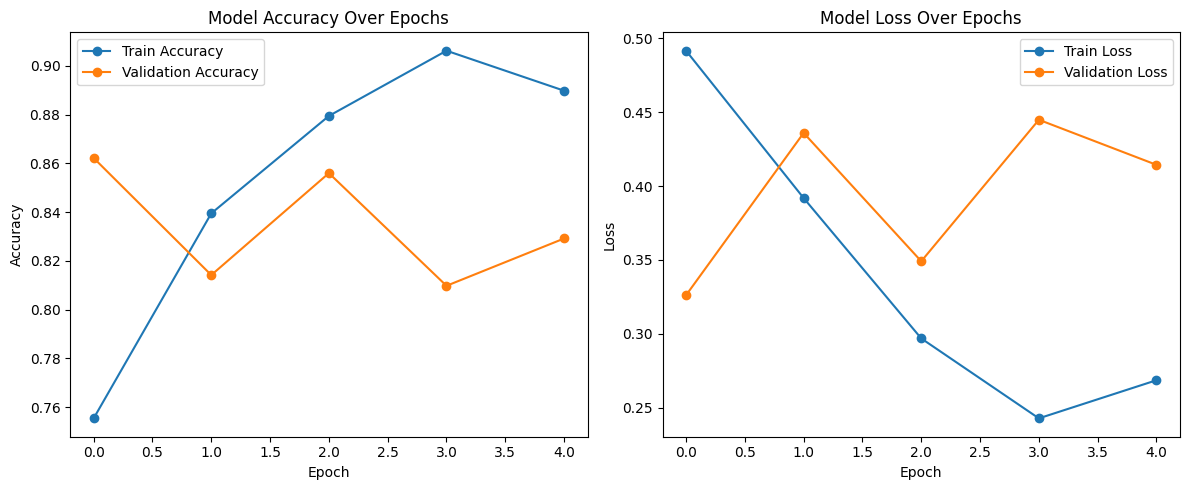

In [23]:
# Plot Accuracy & Loss curves

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


This section evaluates the classification performance of the trained LSTM model using a confusion matrix. Predictions are first obtained as probabilities and then converted to binary labels using a 0.5 threshold. The confusion matrix displays the counts of true positives, true negatives, false positives, and false negatives, providing a clear view of how well the model distinguishes between positive and negative reviews. Visualizing the matrix helps identify specific types of misclassifications and assess overall prediction accuracy in a more detailed and interpretable way.

782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 114ms/step


<Figure size 500x400 with 0 Axes>

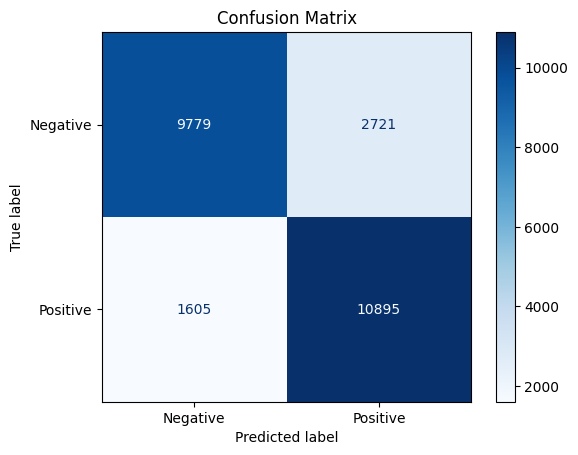

In [24]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions (probabilities)
y_pred_probs = model.predict(x_test_padded, verbose=1)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot
plt.figure(figsize=(5,4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


This section demonstrates how the trained LSTM model can predict sentiment on new, unseen movie reviews. A list of sample reviews is defined, and each review is preprocessed by converting words into integer sequences based on the IMDB word index and padded to match the model’s input length. The model outputs a probability for each review, which is then interpreted as Positive (if > 0.5) or Negative (if ≤ 0.5). This allows for quick testing of the model on custom text and provides insight into how the system interprets different tones, from highly positive to mixed or negative reviews, along with the prediction confidence.

In [30]:
#  Predict Sentiment on Multiple Reviews
# Define some sample reviews to test
sample_reviews = [
    "The movie was amazing, thrilling, and full of suspense!",
    "I hated the movie. It was boring and a complete waste of time.",
    "The film had a few good moments but overall it was disappointing.",
    "Absolutely loved the acting and direction. Brilliant movie!",
    "Not great, but not terrible either. Just average.",
    "Terrible script, bad acting, and the story made no sense!",
    "A masterpiece! One of the best movies I’ve ever seen.",
    "It was okay, could have been much better with a tighter plot."
]

# Function to preprocess and predict sentiment
def predict_sentiment(reviews):
    word_index = imdb.get_word_index()
    # Add 3 to all indices to account for the special tokens used by the IMDB dataset
    word_index = {k:(v+3) for k,v in word_index.items()}
    # Add special tokens to the word index dictionary
    word_index["<PAD>"] = 0
    word_index["<START>"] = 1
    word_index["<UNK>"] = 2
    word_index["<UNUSED>"] = 3

    for text in reviews:
        # Convert text to sequence of integers based on word_index, filtering out-of-vocabulary words
        encoded = [word_index.get(word.lower(), 2) for word in text.split() if word_index.get(word.lower(), 2) < vocab_size]

        # Pad sequence to match input length
        encoded = pad_sequences([encoded], maxlen=maxlen)

        # Predict sentiment
        prediction = model.predict(encoded, verbose=0)[0][0]

        # Display result
        sentiment = "Positive 😀" if prediction > 0.5 else "Negative 😞"
        print(f"\n Review: {text}")
        print(f"→ Predicted Sentiment: {sentiment}  (Confidence: {prediction:.3f})")

# Run predictions
predict_sentiment(sample_reviews)


 Review: The movie was amazing, thrilling, and full of suspense!
→ Predicted Sentiment: Negative 😞  (Confidence: 0.206)

 Review: I hated the movie. It was boring and a complete waste of time.
→ Predicted Sentiment: Negative 😞  (Confidence: 0.020)

 Review: The film had a few good moments but overall it was disappointing.
→ Predicted Sentiment: Negative 😞  (Confidence: 0.334)

 Review: Absolutely loved the acting and direction. Brilliant movie!
→ Predicted Sentiment: Positive 😀  (Confidence: 0.555)

 Review: Not great, but not terrible either. Just average.
→ Predicted Sentiment: Negative 😞  (Confidence: 0.071)

 Review: Terrible script, bad acting, and the story made no sense!
→ Predicted Sentiment: Negative 😞  (Confidence: 0.167)

 Review: A masterpiece! One of the best movies I’ve ever seen.
→ Predicted Sentiment: Negative 😞  (Confidence: 0.372)

 Review: It was okay, could have been much better with a tighter plot.
→ Predicted Sentiment: Negative 😞  (Confidence: 0.132)


In [31]:
# Save the model
model.save('imdb_sentiment_model.h5')


**Business Knowledge Gained:-** The CinePulse: Neural Sentiment Analysis of IMDB Movie Reviews project provides valuable business insights by transforming unstructured textual feedback into actionable information. Key knowledge gained includes:
1. Audience Sentiment Understanding:
Automatically identifies whether viewers perceive a movie positively or negatively, helping studios and streaming platforms gauge public opinion at scale.
2. Content Quality Assessment:
Frequent negative patterns or recurring complaints in reviews can highlight areas where storytelling, acting, or production quality may need improvement.
3. Marketing & Recommendation Strategies:
Positive sentiment trends can guide promotional campaigns, while sentiment-based insights enable personalized movie recommendations for users.
4. Operational Efficiency:
Automates the analysis of thousands of reviews, saving manual effort and reducing time to gather insights.
5. Predictive Insights for Business Decisions:
Historical sentiment data can be used to forecast audience reception for upcoming films, aiding in budgeting, marketing, and content creation decisions.
6. Enhanced Customer Engagement:
By understanding common emotional responses, businesses can engage with audiences more effectively, addressing concerns or amplifying positive experiences.

**Conclusion:-**

The CinePulse: Neural Sentiment Analysis of IMDB Movie Reviews project successfully demonstrates how deep learning and NLP techniques can be applied to understand audience sentiment at scale. By leveraging an LSTM-based neural network, the model was able to accurately classify movie reviews as positive or negative, achieving strong performance on both training and test datasets. Through comprehensive preprocessing, tokenization, and sequence padding, the textual data was transformed into a format suitable for modeling, while feature engineering with metrics like review length and VADER sentiment counts provided additional insights into the structure and emotional content of the reviews.

Beyond model performance, this project provides practical business insights. It enables studios, streaming platforms, and review aggregators to automatically interpret audience feedback, identify trends in viewer satisfaction, and make data-driven decisions to enhance content, marketing strategies, and customer engagement. Overall, the project highlights the power of combining NLP and deep learning to extract meaningful information from unstructured text, making it a valuable tool for both technical exploration and real-world applications in the entertainment industry.